# Problem Statement

Analyzing the data set of HR_comma_sep file and finding out what are the impacts of various independent variable like, department, salary on employees retention

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [48]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [49]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [50]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


#Employees are more likely to stay if:

    They are more satisfied
    have high salary
    spend less than 200 hours per month at work

<AxesSubplot:title={'center':'Impact of employees salary on retention'}, xlabel='salary'>

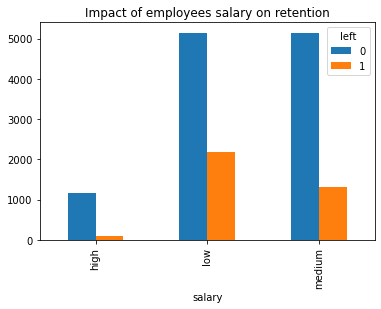

In [54]:
pd.crosstab(df.salary, df.left).plot(kind='bar', title="Correlation between Employee's salary and retention")

#we can see here too that the ratio of employees that stayed to the employees that left in high paid bar is very low, whereas in low and medium group its in some effective proportion

<AxesSubplot:title={'center':'Correlation between dapartment and retention'}, xlabel='Department'>

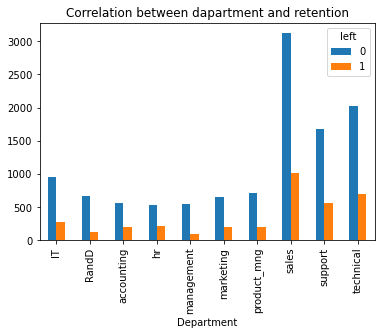

In [56]:
pd.crosstab(df.Department, df.left).plot(kind='bar', title='Correlation between dapartment and retention')

In [8]:
dummies=pd.get_dummies(df.Department)
dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [12]:
merged=pd.concat([df, dummies], axis=1)
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0


In [16]:
new_df=merged.drop(['Department', 'RandD'], axis=1)
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,1,0


In [59]:
#salary={'low': 1,
        #'medium': 2,
        #'high':3}
#new_df['salary_new']=new_df['salary'].map(salary)


In [33]:
new_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_new
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1


In [35]:
X=new_df.drop('left', axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_new
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,2
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,2
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1


In [38]:
y=new_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
model=LogisticRegression()
model.fit(X,y)

C:\Users\dwive\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
model.predict([[0.1, 0.1, 1,150, 2, 0, 0, 1, 0,0,0,0,0,0,0,0, 1]])

array([1], dtype=int64)

In [47]:
model.score(X,y)

0.7965197679845323